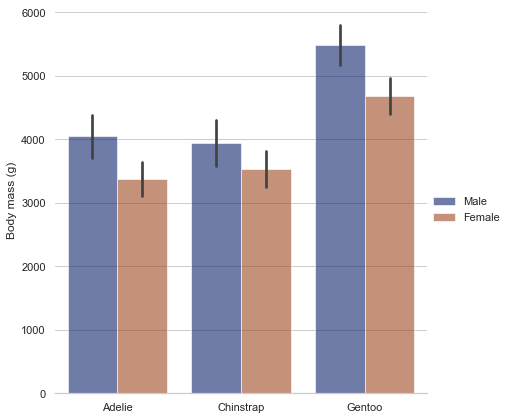

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [5]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
print(flights.year)

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: year, Length: 144, dtype: int64


<AxesSubplot:xlabel='year', ylabel='passengers'>

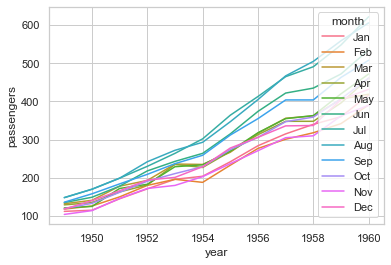

In [6]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

In [24]:
itr = [20,40,60,80,100,200,300,400,500]
default_tr=[21.6712,16.3849,16.3849,5.6023,5.6023,5.6023,5.6023,5.6023,5.6023]
halton_tr=[10.7068,10.7068,15.0726,15.0726,15.0726,15.0726,15.0726,15.0726,15.0726]
sobol_tr=[6.4175,16.5378,16.5378,16.5378,16.5378,15.5397,13.6588,13.6588,13.6588]
default_te=[60.0556,53.3026,53.3026,58.1397,58.1397,58.1397,58.1397,58.1397,58.1397]
halton_te=[55.7840,55.7840,55.4426,55.4426,55.4426,55.4426,55.4426,55.4426,55.4426]
sobol_te=[62.7678,55.3106,55.3106,55.3106,55.3106,54.3022,54.8471,54.8471,54.8471]
    
d = pd.DataFrame(data={'itr':[20,40,60,80,100,200,300,400,500],
    'default_tr':[21.6712,16.3849,16.3849,5.6023,5.6023,5.6023,5.6023,5.6023,5.6023],
    'halton_tr':[10.7068,10.7068,15.0726,15.0726,15.0726,15.0726,15.0726,15.0726,15.0726],
    'sobol_tr':[6.4175,16.5378,16.5378,16.5378,16.5378,15.5397,13.6588,13.6588,13.6588],
    'default_te':[60.0556,53.3026,53.3026,58.1397,58.1397,58.1397,58.1397,58.1397,58.1397],
    'halton_te':[55.7840,55.7840,55.4426,55.4426,55.4426,55.4426,55.4426,55.4426,55.4426],
    'sobol_te':[62.7678,55.3106,55.3106,55.3106,55.3106,54.3022,54.8471,54.8471,54.8471]})

df = d.T

print(df)

                  0        1        2        3         4         5         6  \
itr         20.0000  40.0000  60.0000  80.0000  100.0000  200.0000  300.0000   
default_tr  21.6712  16.3849  16.3849   5.6023    5.6023    5.6023    5.6023   
halton_tr   10.7068  10.7068  15.0726  15.0726   15.0726   15.0726   15.0726   
sobol_tr     6.4175  16.5378  16.5378  16.5378   16.5378   15.5397   13.6588   
default_te  60.0556  53.3026  53.3026  58.1397   58.1397   58.1397   58.1397   
halton_te   55.7840  55.7840  55.4426  55.4426   55.4426   55.4426   55.4426   
sobol_te    62.7678  55.3106  55.3106  55.3106   55.3106   54.3022   54.8471   

                   7         8  
itr         400.0000  500.0000  
default_tr    5.6023    5.6023  
halton_tr    15.0726   15.0726  
sobol_tr     13.6588   13.6588  
default_te   58.1397   58.1397  
halton_te    55.4426   55.4426  
sobol_te     54.8471   54.8471  


In [2]:
itr = [20,40,60,80,100,200,300,400,500]
default_tr=[21.6712,16.3849,16.3849,5.6023,5.6023,5.6023,5.6023,5.6023,5.6023]
halton_tr=[10.7068,10.7068,15.0726,15.0726,15.0726,15.0726,15.0726,15.0726,15.0726]
sobol_tr=[6.4175,16.5378,16.5378,16.5378,16.5378,15.5397,13.6588,13.6588,13.6588]
default_te=[60.0556,53.3026,53.3026,58.1397,58.1397,58.1397,58.1397,58.1397,58.1397]
halton_te=[55.7840,55.7840,55.4426,55.4426,55.4426,55.4426,55.4426,55.4426,55.4426]
sobol_te=[62.7678,55.3106,55.3106,55.3106,55.3106,54.3022,54.8471,54.8471,54.8471]
d=np.append(np.append(np.append(np.append(np.append(default_tr,default_te),halton_tr),halton_te),sobol_tr),sobol_te)

df = pd.DataFrame(data={'iteration':itr*6,'RMSE':d,
                       'sampling':['default_train']*9+['default_test']*9+['Halton_train']*9+['Halton_test']*9+['Sobol_train']*9+['Sobol_test']*9})
print(df)

    iteration     RMSE       sampling
0          20  21.6712  default_train
1          40  16.3849  default_train
2          60  16.3849  default_train
3          80   5.6023  default_train
4         100   5.6023  default_train
5         200   5.6023  default_train
6         300   5.6023  default_train
7         400   5.6023  default_train
8         500   5.6023  default_train
9          20  60.0556   default_test
10         40  53.3026   default_test
11         60  53.3026   default_test
12         80  58.1397   default_test
13        100  58.1397   default_test
14        200  58.1397   default_test
15        300  58.1397   default_test
16        400  58.1397   default_test
17        500  58.1397   default_test
18         20  10.7068   Halton_train
19         40  10.7068   Halton_train
20         60  15.0726   Halton_train
21         80  15.0726   Halton_train
22        100  15.0726   Halton_train
23        200  15.0726   Halton_train
24        300  15.0726   Halton_train
25        40

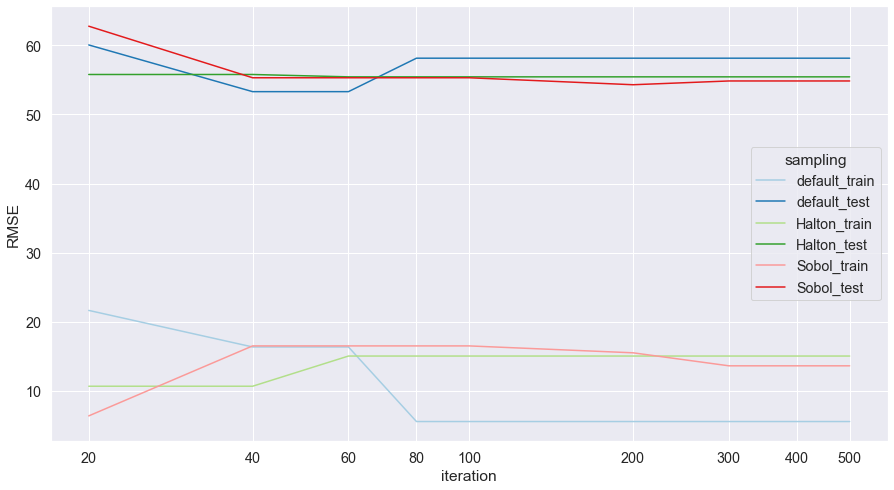

In [3]:
import matplotlib
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.3)
sns.set_palette(sns.color_palette("Paired"))
g = sns.lineplot(data=df, x='iteration', y='RMSE', hue='sampling')
g.set_xscale("log")
g.set_xticks(itr)
g.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig('hp_opt_distri.png',bbox_inches='tight')